In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# initial Reqs

In [252]:
#packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import os
from math import pi
from itertools import combinations_with_replacement
import pickle
from IPython.display import display
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 150)
from natsort import natsorted
import seaborn as sns
import scipy.stats as stats 
from collections import Counter
from itertools import groupby
from operator import itemgetter
from itertools import combinations
import time
import datetime
import choix
import plotly.graph_objects as go
from tqdm import tqdm
import glob
import natsort
from tabulate import tabulate

# Load

In [2]:
finalMatchSubs=['sub3','sub7','sub8','sub9','sub10','sub11','sub12','sub13','sub15','sub16','sub18','sub20',
 'sub23','sub24','sub25','sub26','sub28','sub30','sub31','sub33','sub35','sub36','sub37','sub38',
 'sub40','sub41','sub44','sub45','sub46','sub47','sub48','sub49','sub50','sub1','sub2','sub5','sub6','sub14','sub19','sub22','sub29','sub32','sub39','sub42']
finalMatchSubs=natsorted(finalMatchSubs)

In [3]:
#subject class for loading
class Subject():
    def __init__(self,subname):
        self.subname=subname
#load
os.chdir(r"C:\Users\al33m\Box Sync\Grzywacz Lab\Experiment\Data_Files\scp\Visit5\pickle")
subs={}
for i in finalMatchSubs:
    print(i)
    with open(i+'.pkl', 'rb') as input:
        subs[i] = pickle.load(input)

sub1
sub2
sub3
sub5
sub6
sub7
sub8
sub9
sub10
sub11
sub12
sub13
sub14
sub15
sub16
sub18
sub19
sub20
sub22
sub23
sub24
sub25
sub26
sub28
sub29
sub30
sub31
sub32
sub33
sub35
sub36
sub37
sub38
sub39
sub40
sub41
sub42
sub44
sub45
sub46
sub47
sub48
sub49
sub50


find the same comparison across multiple weeks

# package

In [24]:
from functools import reduce
def align(df, columns):
    ret = df.copy(deep=True)
    ret[columns] = np.sort(df[columns])
    return ret
pat=re.compile('\d+')


## Implement

In [25]:
for i in finalMatchSubs[:-1]:
    print(i)
    """
    shirts
    """
    subs[i].Shirts_data_frames=[align(subs[i].preShirts,['Limg','Rimg']),align(subs[i].postShirts,['Limg','Rimg']),align(subs[i].w1_Shirts,['Limg','Rimg']), align(subs[i].w2_Shirts,['Limg','Rimg']),
                 align(subs[i].w3_Shirts,['Limg','Rimg']), align(subs[i].w4_Shirts,['Limg','Rimg'])]

    subs[i].Shirts_df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Limg','Rimg'],
                                                how='outer'), subs[i].Shirts_data_frames)
    
    subs[i].Shirts_df_merged=subs[i].Shirts_df_merged.iloc[:,[1,2,3,4,5,7,8,9,11,12,13,15,16,17,19,20,21,23,24,25]]
    subs[i].Shirts_df_merged.columns=['pre_rt','Limg','Rimg','pre_winner','pre_loser','post_rt','post_winner','post_loser','w1_rt','w1_winner','w1_loser',
                            'w2_rt','w2_winner','w2_loser','w3_rt','w3_winner',
                            'w3_loser','w4_rt','w4_winner','w4_loser']

    subs[i].Shirts_df_merged['Lint']=[int(re.findall(pat,i)[0]) for i in subs[i].Shirts_df_merged['Limg']]
    subs[i].Shirts_df_merged['Rint']=[int(re.findall(pat,i)[0]) for i in subs[i].Shirts_df_merged['Rimg']]
    subs[i].Shirts_df_merged['Diff']=abs(np.array(subs[i].Shirts_df_merged['Lint'])-np.array(subs[i].Shirts_df_merged['Rint']))

    #compare what was picked across different time points
    subs[i].Shirts_df_merged['AB']=subs[i].Shirts_df_merged['pre_winner']==subs[i].Shirts_df_merged['post_winner']
    subs[i].Shirts_df_merged['AC']=subs[i].Shirts_df_merged['pre_winner']==subs[i].Shirts_df_merged['w1_winner']
    subs[i].Shirts_df_merged['AD']=subs[i].Shirts_df_merged['pre_winner']==subs[i].Shirts_df_merged['w2_winner']
    subs[i].Shirts_df_merged['AE']=subs[i].Shirts_df_merged['pre_winner']==subs[i].Shirts_df_merged['w3_winner']
    subs[i].Shirts_df_merged['AF']=subs[i].Shirts_df_merged['pre_winner']==subs[i].Shirts_df_merged['w4_winner']
    subs[i].Shirts_df_merged['BC']=subs[i].Shirts_df_merged['post_winner']==subs[i].Shirts_df_merged['w1_winner']
    subs[i].Shirts_df_merged['BD']=subs[i].Shirts_df_merged['post_winner']==subs[i].Shirts_df_merged['w2_winner']
    subs[i].Shirts_df_merged['BE']=subs[i].Shirts_df_merged['post_winner']==subs[i].Shirts_df_merged['w3_winner']
    subs[i].Shirts_df_merged['BF']=subs[i].Shirts_df_merged['post_winner']==subs[i].Shirts_df_merged['w4_winner']
    subs[i].Shirts_df_merged['CD']=subs[i].Shirts_df_merged['w1_winner']==subs[i].Shirts_df_merged['w2_winner']
    subs[i].Shirts_df_merged['CE']=subs[i].Shirts_df_merged['w1_winner']==subs[i].Shirts_df_merged['w3_winner']
    subs[i].Shirts_df_merged['CF']=subs[i].Shirts_df_merged['w1_winner']==subs[i].Shirts_df_merged['w4_winner']
    subs[i].Shirts_df_merged['DE']=subs[i].Shirts_df_merged['w2_winner']==subs[i].Shirts_df_merged['w3_winner']
    subs[i].Shirts_df_merged['DF']=subs[i].Shirts_df_merged['w2_winner']==subs[i].Shirts_df_merged['w4_winner']
    subs[i].Shirts_df_merged['EF']=subs[i].Shirts_df_merged['w3_winner']==subs[i].Shirts_df_merged['w4_winner']
    
    """
    cars
    """
    subs[i].Cars_data_frames=[align(subs[i].preCars,['Limg','Rimg']),align(subs[i].postCars,['Limg','Rimg']),align(subs[i].w1_Cars,['Limg','Rimg']), align(subs[i].w2_Cars,['Limg','Rimg']),
                 align(subs[i].w3_Cars,['Limg','Rimg']), align(subs[i].w4_Cars,['Limg','Rimg'])]

    subs[i].Cars_df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Limg','Rimg'],
                                                how='outer'), subs[i].Cars_data_frames)
    
    subs[i].Cars_df_merged=subs[i].Cars_df_merged.iloc[:,[1,2,3,4,5,7,8,9,11,12,13,15,16,17,19,20,21,23,24,25]]
    subs[i].Cars_df_merged.columns=['pre_rt','Limg','Rimg','pre_winner','pre_loser','post_rt','post_winner','post_loser','w1_rt','w1_winner','w1_loser',
                            'w2_rt','w2_winner','w2_loser','w3_rt','w3_winner',
                            'w3_loser','w4_rt','w4_winner','w4_loser']
    subs[i].Cars_df_merged['Lint']=[int(re.findall(pat,i)[0]) for i in subs[i].Cars_df_merged['Limg']]
    subs[i].Cars_df_merged['Rint']=[int(re.findall(pat,i)[0]) for i in subs[i].Cars_df_merged['Rimg']]
    subs[i].Cars_df_merged['Diff']=abs(np.array(subs[i].Cars_df_merged['Lint'])-np.array(subs[i].Cars_df_merged['Rint']))

    subs[i].Cars_df_merged['AB']=subs[i].Cars_df_merged['pre_winner']==subs[i].Cars_df_merged['post_winner']
    subs[i].Cars_df_merged['AC']=subs[i].Cars_df_merged['pre_winner']==subs[i].Cars_df_merged['w1_winner']
    subs[i].Cars_df_merged['AD']=subs[i].Cars_df_merged['pre_winner']==subs[i].Cars_df_merged['w2_winner']
    subs[i].Cars_df_merged['AE']=subs[i].Cars_df_merged['pre_winner']==subs[i].Cars_df_merged['w3_winner']
    subs[i].Cars_df_merged['AF']=subs[i].Cars_df_merged['pre_winner']==subs[i].Cars_df_merged['w4_winner']
    subs[i].Cars_df_merged['BC']=subs[i].Cars_df_merged['post_winner']==subs[i].Cars_df_merged['w1_winner']
    subs[i].Cars_df_merged['BD']=subs[i].Cars_df_merged['post_winner']==subs[i].Cars_df_merged['w2_winner']
    subs[i].Cars_df_merged['BE']=subs[i].Cars_df_merged['post_winner']==subs[i].Cars_df_merged['w3_winner']
    subs[i].Cars_df_merged['BF']=subs[i].Cars_df_merged['post_winner']==subs[i].Cars_df_merged['w4_winner']
    subs[i].Cars_df_merged['CD']=subs[i].Cars_df_merged['w1_winner']==subs[i].Cars_df_merged['w2_winner']
    subs[i].Cars_df_merged['CE']=subs[i].Cars_df_merged['w1_winner']==subs[i].Cars_df_merged['w3_winner']
    subs[i].Cars_df_merged['CF']=subs[i].Cars_df_merged['w1_winner']==subs[i].Cars_df_merged['w4_winner']
    subs[i].Cars_df_merged['DE']=subs[i].Cars_df_merged['w2_winner']==subs[i].Cars_df_merged['w3_winner']
    subs[i].Cars_df_merged['DF']=subs[i].Cars_df_merged['w2_winner']==subs[i].Cars_df_merged['w4_winner']
    subs[i].Cars_df_merged['EF']=subs[i].Cars_df_merged['w3_winner']==subs[i].Cars_df_merged['w4_winner']
    
    """
    phones
    """
    subs[i].Phones_data_frames=[align(subs[i].prePhones,['Limg','Rimg']),align(subs[i].postPhones,['Limg','Rimg']),align(subs[i].w1_Phones,['Limg','Rimg']), align(subs[i].w2_Phones,['Limg','Rimg']),
                 align(subs[i].w3_Phones,['Limg','Rimg']), align(subs[i].w4_Phones,['Limg','Rimg'])]

    subs[i].Phones_df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Limg','Rimg'],
                                                how='outer'), subs[i].Phones_data_frames)
    
    subs[i].Phones_df_merged=subs[i].Phones_df_merged.iloc[:,[1,2,3,4,5,7,8,9,11,12,13,15,16,17,19,20,21,23,24,25]]
    subs[i].Phones_df_merged.columns=['pre_rt','Limg','Rimg','pre_winner','pre_loser','post_rt','post_winner','post_loser','w1_rt','w1_winner','w1_loser',
                            'w2_rt','w2_winner','w2_loser','w3_rt','w3_winner',
                            'w3_loser','w4_rt','w4_winner','w4_loser']

    subs[i].Phones_df_merged['Lint']=[int(re.findall(pat,i)[0]) for i in subs[i].Phones_df_merged['Limg']]
    subs[i].Phones_df_merged['Rint']=[int(re.findall(pat,i)[0]) for i in subs[i].Phones_df_merged['Rimg']]
    subs[i].Phones_df_merged['Diff']=abs(np.array(subs[i].Phones_df_merged['Lint'])-np.array(subs[i].Phones_df_merged['Rint']))
    
    subs[i].Phones_df_merged['AB']=subs[i].Phones_df_merged['pre_winner']==subs[i].Phones_df_merged['post_winner']
    subs[i].Phones_df_merged['AC']=subs[i].Phones_df_merged['pre_winner']==subs[i].Phones_df_merged['w1_winner']
    subs[i].Phones_df_merged['AD']=subs[i].Phones_df_merged['pre_winner']==subs[i].Phones_df_merged['w2_winner']
    subs[i].Phones_df_merged['AE']=subs[i].Phones_df_merged['pre_winner']==subs[i].Phones_df_merged['w3_winner']
    subs[i].Phones_df_merged['AF']=subs[i].Phones_df_merged['pre_winner']==subs[i].Phones_df_merged['w4_winner']
    subs[i].Phones_df_merged['BC']=subs[i].Phones_df_merged['post_winner']==subs[i].Phones_df_merged['w1_winner']
    subs[i].Phones_df_merged['BD']=subs[i].Phones_df_merged['post_winner']==subs[i].Phones_df_merged['w2_winner']
    subs[i].Phones_df_merged['BE']=subs[i].Phones_df_merged['post_winner']==subs[i].Phones_df_merged['w3_winner']
    subs[i].Phones_df_merged['BF']=subs[i].Phones_df_merged['post_winner']==subs[i].Phones_df_merged['w4_winner']
    subs[i].Phones_df_merged['CD']=subs[i].Phones_df_merged['w1_winner']==subs[i].Phones_df_merged['w2_winner']
    subs[i].Phones_df_merged['CE']=subs[i].Phones_df_merged['w1_winner']==subs[i].Phones_df_merged['w3_winner']
    subs[i].Phones_df_merged['CF']=subs[i].Phones_df_merged['w1_winner']==subs[i].Phones_df_merged['w4_winner']
    subs[i].Phones_df_merged['DE']=subs[i].Phones_df_merged['w2_winner']==subs[i].Phones_df_merged['w3_winner']
    subs[i].Phones_df_merged['DF']=subs[i].Phones_df_merged['w2_winner']==subs[i].Phones_df_merged['w4_winner']
    subs[i].Phones_df_merged['EF']=subs[i].Phones_df_merged['w3_winner']==subs[i].Phones_df_merged['w4_winner']

sub1
sub2
sub3
sub5
sub6
sub7
sub8
sub9
sub10
sub11
sub12
sub13
sub14
sub15
sub16
sub18
sub19
sub20
sub22
sub23
sub24
sub25
sub26
sub28
sub29
sub30
sub31
sub32
sub33
sub35
sub36
sub37
sub38
sub39
sub40
sub41
sub42
sub44
sub45
sub46
sub47
sub48
sub49
sub50


# pickle and save

In [26]:
os.chdir(r"C:\Users\al33m\Box Sync\Grzywacz Lab\Experiment\Data_Files\scp\Visit5\pickle")

for i in finalMatchSubs[:-1]:
    print(i)
    with open(i+'.pkl', 'wb') as output:
        pickle.dump(subs[i],output, pickle.HIGHEST_PROTOCOL)

sub1
sub2
sub3
sub5
sub6
sub7
sub8
sub9
sub10
sub11
sub12
sub13
sub14
sub15
sub16
sub18
sub19
sub20
sub22
sub23
sub24
sub25
sub26
sub28
sub29
sub30
sub31
sub32
sub33
sub35
sub36
sub37
sub38
sub39
sub40
sub41
sub42
sub44
sub45
sub46
sub47
sub48
sub49
sub50


## csv

In [325]:
# os.chdir(r"C:\Users\al33m\Box Sync\Grzywacz Lab\Experiment\Data_Files\scp\forR\subjectWise\Shirts")
# os.chdir(r"C:\Users\al33m\Box Sync\Grzywacz Lab\Experiment\Data_Files\scp\forR\subjectWise\Cars")
# os.chdir(r"C:\Users\al33m\Box Sync\Grzywacz Lab\Experiment\Data_Files\scp\forR\subjectWise\Phones")

for i in finalMatchSubs[:-1]:
    print(i)
#     subs[i].Shirts_df_merged.to_csv(i+"shirtsDF.csv",index=False)
#     subs[i].Cars_df_merged.to_csv(i+"carsDF.csv",index=False)
#     subs[i].Phones_df_merged.to_csv(i+"phonesDF.csv",index=False)


sub1
sub2
sub3
sub5
sub6
sub7
sub8
sub9
sub10
sub11
sub12
sub13
sub14
sub15
sub16
sub18
sub19
sub20
sub22
sub23
sub24
sub25
sub26
sub28
sub29
sub30
sub31
sub32
sub33
sub35
sub36
sub37
sub38
sub39
sub40
sub41
sub42
sub44
sub45
sub46
sub47
sub48
sub49
sub50


# Paired Consistency

Paired Consistency is inspired by kendall concordance or kendall's W, (https://en.wikipedia.org/wiki/Kendall%27s_W) in that it looks at a collection of choices, whether across individuals or within them, to see the amount of agreement. The consistency is 'paired' as it only looks at two instances at one time.


If the decisions are made randomly, then about 50% of items should match by chance. If all match, then PC will be 1, if none then 0, therefore, it is defined simply as

    PC=matches/N

where n= total # of decisions


**Example**

consider 6 shirts that were picked on 5 different occasions,  we can collect the winners at each competition to see if there is a consistency in choice




In [385]:
ex=pd.DataFrame({'A':['shirt1','shirt2','shirt5'],
             'B': ['shirt1','shirt2','shirt5'],
             'C': ['shirt1','shirt3','shirt6'],
             'D': ['shirt1','shirt3','shirt6'],
            'E': ['shirt2','shirt3','shirt6']})
print(tabulate(ex, tablefmt="pipe", headers="keys"))

|    | A      | B      | C      | D      | E      |
|---:|:-------|:-------|:-------|:-------|:-------|
|  0 | shirt1 | shirt1 | shirt1 | shirt1 | shirt2 |
|  1 | shirt2 | shirt2 | shirt3 | shirt3 | shirt3 |
|  2 | shirt5 | shirt5 | shirt6 | shirt6 | shirt6 |


we can now take this and look at specific time points so that AB is the change from winner1 and winner2, AC is the change from winner1 and winner3 and so forth. A TRUE represents that the winner was the same, while FALSE means the winner is different

In [386]:
exBool=pd.DataFrame({'AB':ex['A']==ex['B'],
             'AC':ex['A']==ex['C'],
             'AD':ex['A']==ex['D'],
             'AE':ex['A']==ex['E']})
exBool

,AB,AC,AD,AE
0,True,True,True,False
1,True,False,False,False
2,True,False,False,False


Now we can sum these values to get the total counts for timepoints

Sum of the columns:

In [387]:
np.sum(exBool)

AB    3
AC    1
AD    1
AE    0
dtype: int64

Dividing by n to get the PC

In [388]:
np.sum(exBool)/len(exBool)

AB    1.000000
AC    0.333333
AD    0.333333
AE    0.000000
dtype: float64

- this indicates that between timepoint A and B, all of the choices were consistent, whereas between A and E, none of the choices were consistent
- we can visualise this in a similar way to L1

Text(0, 0.5, 'Paired Consistency')

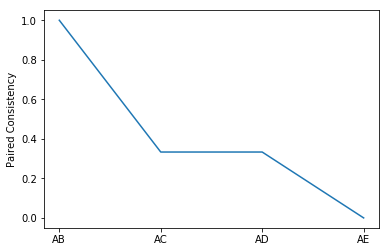

In [389]:
plt.plot(np.sum(exBool)/len(exBool))
plt.ylabel('Paired Consistency')

### Null hypotheses

1. can do a straightforward random permutation simulation (guess winner randomly) to establish a null hypothesis against random choice

2. However, would like to have a null hypothesis that can allow us to say one time point is more or less stable than another, T test/Anova of means?

## Subject Data

In [59]:
#put all of the subjects on top of eachother in order to get the timepoints
allTimeBool=pd.DataFrame()
for i in finalMatchSubs:
    allTimeBool=pd.concat([allTimeBool,subs[i].Shirts_df_merged.loc[:,['AB','AC','AD','AE','AF','BC','BD','BE','BF','CD','CE','CF','DE','DF','EF']]],axis=1)
allTimeBool.reset_index(drop=True,inplace=True)    

In [79]:
allTimeBoolFlat=pd.DataFrame({'subname':np.repeat(finalMatchSubs,15),
              'PC':np.mean(allTimeBool),
              'timepoint':np.mean(allTimeBool).index})
allTimeBoolFlat.reset_index(drop=True,inplace=True)

## pair wise

This measure also allows us to look at consistency by a pair of competitors, for example, are shirt1 vs shirt3 more or less stable than shirt1 vs shirt5.-- We would assume that as the distance between the shirts increases, then so should the stability as well. Therefore, we can look at consistency as a function of difference between the two pairs.

The following graph shows this analysis on Shirts data from our study

In [228]:
allPairs=pd.DataFrame()
for i in finalMatchSubs:
    allPairs=pd.concat([allPairs,subs[i].Shirts_df_merged.loc[:,['AB','AC','AD','AE','AF']]],axis=1)

In [229]:
colnames=[]
for i in finalMatchSubs:
    colnames.append([i+k for k in ['AB','AC','AD','AE','AF']])
colnames=[item for sublist in colnames for item in sublist]
allPairs.columns=colnames

In [231]:
boolcolsAll=['AB','AC','AD','AE','AF','BC','BD','BE','BF','CD','CE','CF','DE','DF','EF']
boolcolsLin=['AB','AC','AD','AE','AF']


In [143]:
np.shape(allPairs)

(105, 660)

In [315]:
allPairsMelt=pd.melt(allPairs)

In [204]:
Limg=[i[:-4] for i in subs['sub1'].Shirts_df_merged['Limg']]
Rimg=[i[:-4] for i in subs['sub1'].Shirts_df_merged['Rimg']]

In [316]:
allPairsMelt['timepoint']=np.tile(np.repeat(boolcolsLin,105),44)
allPairsMelt['subname']=np.tile(np.repeat(finalMatchSubs,105),5)
allPairsMelt['Limg']=np.tile(Limg,220)
allPairsMelt['Rimg']=np.tile(Rimg,220)
allPairsMelt['Lint']=np.tile(subs['sub1'].Shirts_df_merged['Lint'],220)
allPairsMelt['Rint']=np.tile(subs['sub1'].Shirts_df_merged['Rint'],220)
allPairsMelt['diff']=np.tile(subs['sub1'].Shirts_df_merged['Diff'],220)
allPairsMelt['pair']=allPairsMelt['Lint'].astype(str)+','+allPairsMelt['Rint'].astype(str)
allPairsMelt.drop(columns=['variable'],inplace=True)

In [241]:
allPairsMelt_bypair=allPairsMelt.groupby(['pair']).agg({'value':['mean']})
allPairsMelt_bypair.reset_index(inplace=True)
allPairsMelt_bypair.columns=['pair','PC']

### by pair

The graph shows consistency of each unique competition, ex. shirts 11 and 3 are more consistent than shirts 7,8

Text(0.8, 0.75, '95% CI')

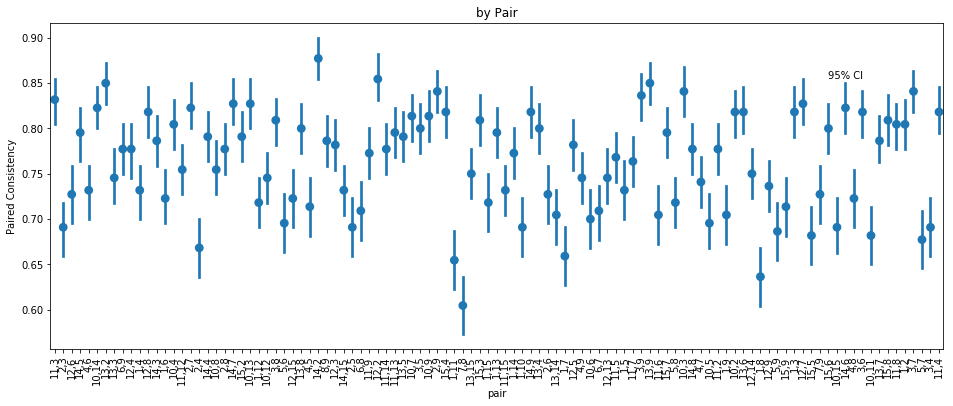

In [378]:
fig=plt.figure(figsize=(16, 6))
sns.pointplot(x='pair',y='value',data=allPairsMelt,join=False,ci=68).set_title('by Pair')
plt.xticks(rotation=90)
plt.ylabel('Paired Consistency')
txt='95% CI'
fig.text(0.8, 0.75, txt)


### by diff

Consistency as a function of how far away the shirts are from each other on the hue spectrum

Text(0.8, 0.75, '95% CI')

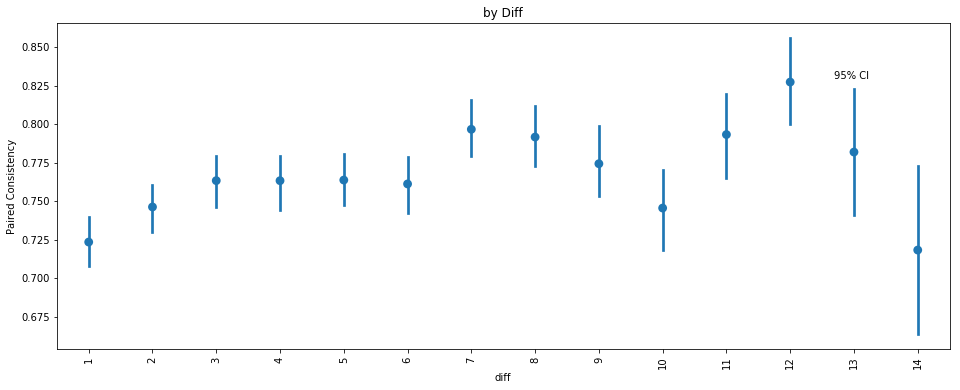

In [377]:
fig=plt.figure(figsize=(16, 6))
sns.pointplot(x='diff',y='value',data=allPairsMelt,ci=95,join=False).set_title('by Diff')
plt.xticks(rotation=90)
plt.ylabel('Paired Consistency')
txt='95% CI'
fig.text(0.8, 0.75, txt)

### by timepoint

Text(0.8, 0.75, '95% CI')

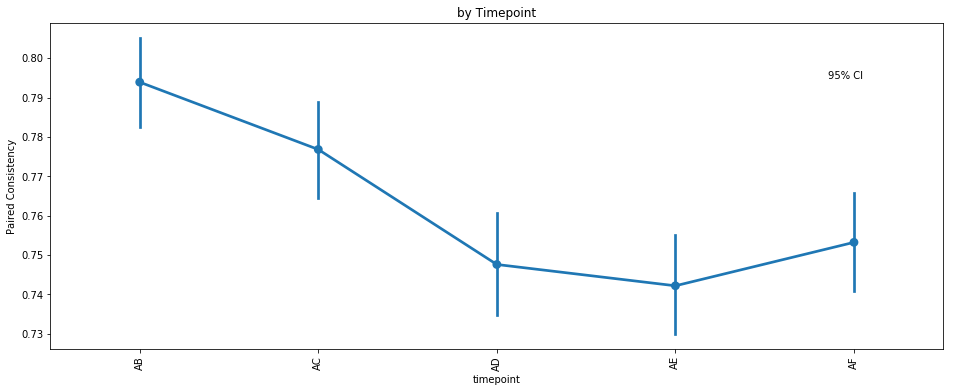

In [376]:
fig=plt.figure(figsize=(16, 6))
sns.pointplot(x='timepoint',y='value',data=allPairsMelt,ci=95).set_title('by Timepoint')
plt.xticks(rotation=90)
plt.ylabel('Paired Consistency')
txt='95% CI'
fig.text(0.8, 0.75, txt)

Text(0.8, 0.75, '95% CI')

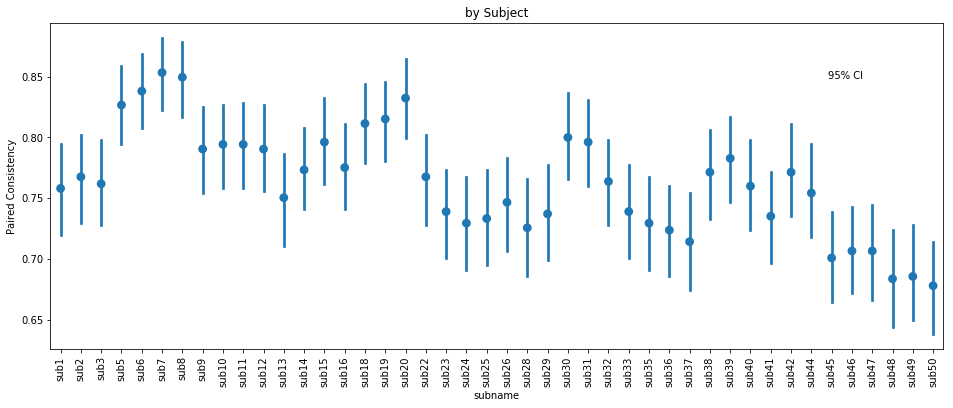

In [379]:
fig=plt.figure(figsize=(16, 6))
sns.pointplot(x='subname',y='value',data=allPairsMelt,ci=95,join=False).set_title('by Subject')
plt.xticks(rotation=90)
plt.ylabel('Paired Consistency')
txt='95% CI'
fig.text(0.8, 0.75, txt)

# temporal consistency

Looking at the example again, while there was certain trends at non consecutive paired instances, we can also observe that some competitions become more consistent when considering consecutive instances

In [390]:
print(tabulate(ex, tablefmt="pipe", headers="keys"))

|    | A      | B      | C      | D      | E      |
|---:|:-------|:-------|:-------|:-------|:-------|
|  0 | shirt1 | shirt1 | shirt1 | shirt1 | shirt2 |
|  1 | shirt2 | shirt2 | shirt3 | shirt3 | shirt3 |
|  2 | shirt5 | shirt5 | shirt6 | shirt6 | shirt6 |


for example, the competition between shirt2 and shirt3 (row 1) starts off by shirt 2 winning, and then afterwards shirt 3 dominates. We can see this dynamic when we look at ALL possible consecutive pairs [AB,AC,AD,AE,BC,BD,BE,CD,CE]. Here, we can see that for both rows 1 and 2, the competitions stabilize relative to consecutive pairs as soon as timepoint B is reached

In [391]:
allexBool=pd.DataFrame({'AB':ex['A']==ex['B'],
             'AC':ex['A']==ex['C'],
             'AD':ex['A']==ex['D'],
             'AE':ex['A']==ex['E'],
                    'BC':ex['B']==ex['C'],
                    'BD':ex['B']==ex['D'],
                    'BE':ex['B']==ex['E'],
                    'CD':ex['C']==ex['D'],
                    'CE':ex['C']==ex['E']})
allexBool

,AB,AC,AD,AE,BC,BD,BE,CD,CE
0,True,True,True,False,True,True,False,True,False
1,True,False,False,False,False,False,False,True,True
2,True,False,False,False,False,False,False,True,True


In [392]:
np.sum(allexBool)

AB    3
AC    1
AD    1
AE    0
BC    1
BD    1
BE    0
CD    3
CE    2
dtype: int64

Text(0, 0.5, 'Paired Consistency')

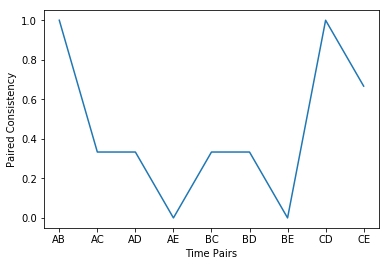

In [404]:
plt.plot(np.mean(allexBool))
plt.xlabel('Time Pairs')
plt.ylabel('Paired Consistency')

Because this measure is currently looking at pairs of timepoints, it fails to capture any 'strings' of wins that would indicate consistency, but we do see a relative rise and fall

## Possible solutions to capture this 

### Cumulative sum

In [398]:
np.cumsum(allexBool,axis=1)

,AB,AC,AD,AE,BC,BD,BE,CD,CE
0,1,2,3,3,4,5,5,6,6
1,1,1,1,1,1,1,1,2,3
2,1,1,1,1,1,1,1,2,3


In [401]:
np.cumsum(allexBool,axis=1)/np.arange(1,10)b


,AB,AC,AD,AE,BC,BD,BE,CD,CE
0,1.0,1.0,1.000000,0.75,0.8,0.833333,0.714286,0.75,0.666667
1,1.0,0.5,0.333333,0.25,0.2,0.166667,0.142857,0.25,0.333333
2,1.0,0.5,0.333333,0.25,0.2,0.166667,0.142857,0.25,0.333333


here we can somewhat capture the values decreasing and then increasing for rows 1 and 2.

### Strings

another option is to count the number and size of consecutive strings

In [406]:
ex

,A,B,C,D,E
0,shirt1,shirt1,shirt1,shirt1,shirt2
1,shirt2,shirt2,shirt3,shirt3,shirt3
2,shirt5,shirt5,shirt6,shirt6,shirt6


In [407]:
foo=[]
for rowidx in np.arange(len(ex)):
    foo.append([(k,sum(1 for i in g)) for k,g in groupby(ex.iloc[rowidx,:])])

In [409]:
pd.DataFrame(foo)

,0,1
0,"(shirt1, 4)","(shirt2, 1)"
1,"(shirt2, 2)","(shirt3, 3)"
2,"(shirt5, 2)","(shirt6, 3)"


each cell shows (shirtname,stringsize), each row represents a competition, whereas columns are dependent on the # of strings

If we know the maximum possible strings, 5, in this case, then we can set up an expected random distribution, (5 strings of size 1) 5x[1] and compare to ours 1x[4],1x[1] for example

In [ ]:
foo

In [272]:
allPairs2=pd.DataFrame()
for i in finalMatchSubs:
    allPairs2=pd.concat([allPairs2,subs[i].Shirts_df_merged.loc[:,['pre_winner','post_winner','w1_winner','w2_winner','w3_winner','w4_winner']]],axis=0)
#     allPairs2=pd.concat([allPairs2,subs[i].Shirts_df_merged.loc[:,['AB','BC','CD','DE','EF']]],axis=0)
allPairs2.reset_index(inplace=True,drop=True)

In [281]:
foo=[]
for rowidx in np.arange(len(allPairs2)):
    foo.append([(k,sum(1 for i in g)) for k,g in groupby(allPairs2.iloc[rowidx,:])])